In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt # to plot the graphs
import matplotlib.gridspec as gridspec # to do the grid of plots

In [44]:
df = pd.read_csv(r"C:\Users\ctyfr\Desktop\GG\archive\creditcard.csv")

In [5]:
df.info()
df.describe()
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## Preliminary data study
1. Y variable: class
2. Time variable
3. Amount variable

In [6]:
print("Distribution of 0 and 1 classes:")
print(df['Class'].value_counts())
print("Ratio between two category:", 
      round(df['Class'].value_counts()[0]/df['Class'].value_counts()[1],2))

Distribution of 0 and 1 classes:
0    284315
1       492
Name: Class, dtype: int64
Ratio between two category: 577.88


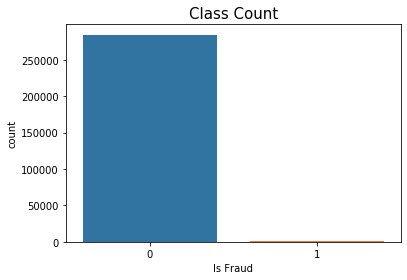

In [4]:
sns.countplot(df['Class'])
plt.title("Class Count",fontsize=15)
plt.xlabel("Is Fraud")
plt.show()

In [45]:
# time variable manipulation

df['timedelta'] = pd.to_timedelta(df['Time'], unit='s')
df['time_min'] = (df['timedelta'].dt.components.minutes).astype(int)
df['time_hr'] = (df['timedelta'].dt.components.hours).astype(int)

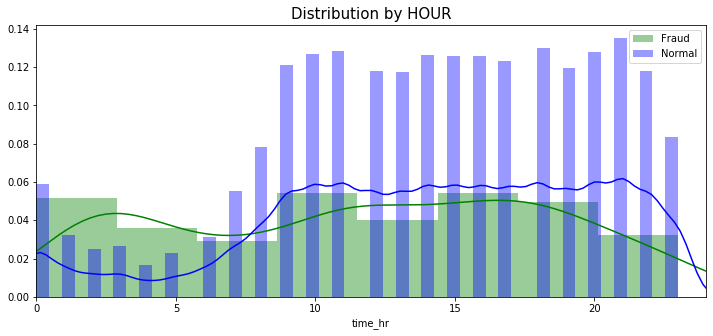

In [42]:
plt.figure(figsize=(12,5))
sns.distplot(df[df.Class == 1]['time_hr'], color='g',label='Fraud')
sns.distplot(df[df.Class == 0]['time_hr'], color='b',label='Normal')
plt.xlim([0,24])
plt.legend()
plt.title("Distribution by HOUR", fontsize=15)
plt.show()

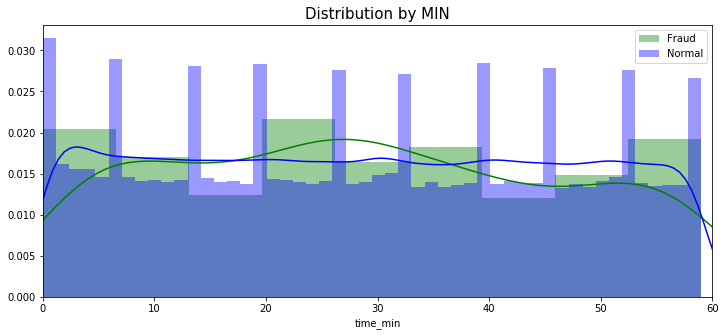

In [44]:
plt.figure(figsize=(12,5))
sns.distplot(df[df.Class==1]['time_min'], color='g', label='Fraud')
sns.distplot(df[df.Class==0]['time_min'], color='b', label='Normal')
plt.legend()
plt.title('Distribution by MIN', fontsize=15)
plt.xlim([0,60])
plt.show()

#### 3. Amount

In [52]:
print("Normal txn, amount distr:")
print(df[df.Class==0]['Amount'].describe())
print("\n-------------------------------------\n")
print("Fraud txn, amount distr:")
print(df[df.Class==1]['Amount'].describe())

Normal txn, amount distr:
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

-------------------------------------

Fraud txn, amount distr:
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


In [6]:
df['log_amount']=np.log(df['Amount']+0.001)
print("Normal txn, log amount distr:")
print(df[df.Class==0]['log_amount'].describe())
print("\n-------------------------------------\n")
print("Fraud txn, log amount distr:")
print(df[df.Class==1]['log_amount'].describe())

Normal txn, log amount distr:
count    284315.000000
mean          2.943498
std           2.020493
min          -6.907755
25%           1.731833
50%           3.091088
75%           4.344468
max          10.153902
Name: log_amount, dtype: float64

-------------------------------------

Fraud txn, log amount distr:
count    492.000000
mean       2.127407
std        3.303417
min       -6.907755
25%        0.001000
50%        2.224722
75%        4.662410
max        7.661937
Name: log_amount, dtype: float64


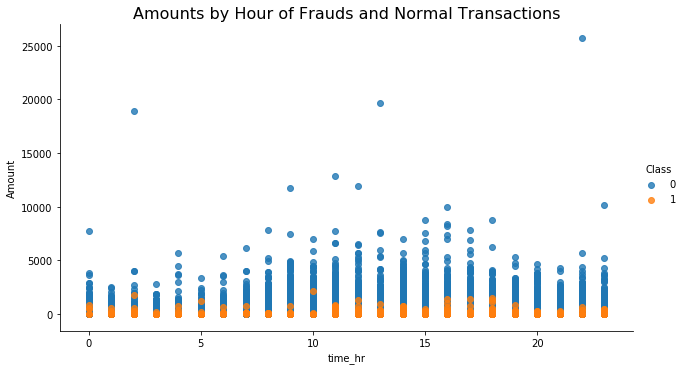

In [67]:
ax = sns.lmplot(y="Amount", x="time_hr", fit_reg=False,aspect=1.8,
                data=df, hue='Class')
plt.title("Amounts by Hour of Frauds and Normal Transactions", fontsize=16)
plt.show()

#### 4. other PCA-ed variables
1. use enumerate to grid 
2. check distribution difference for 0 and 1 class

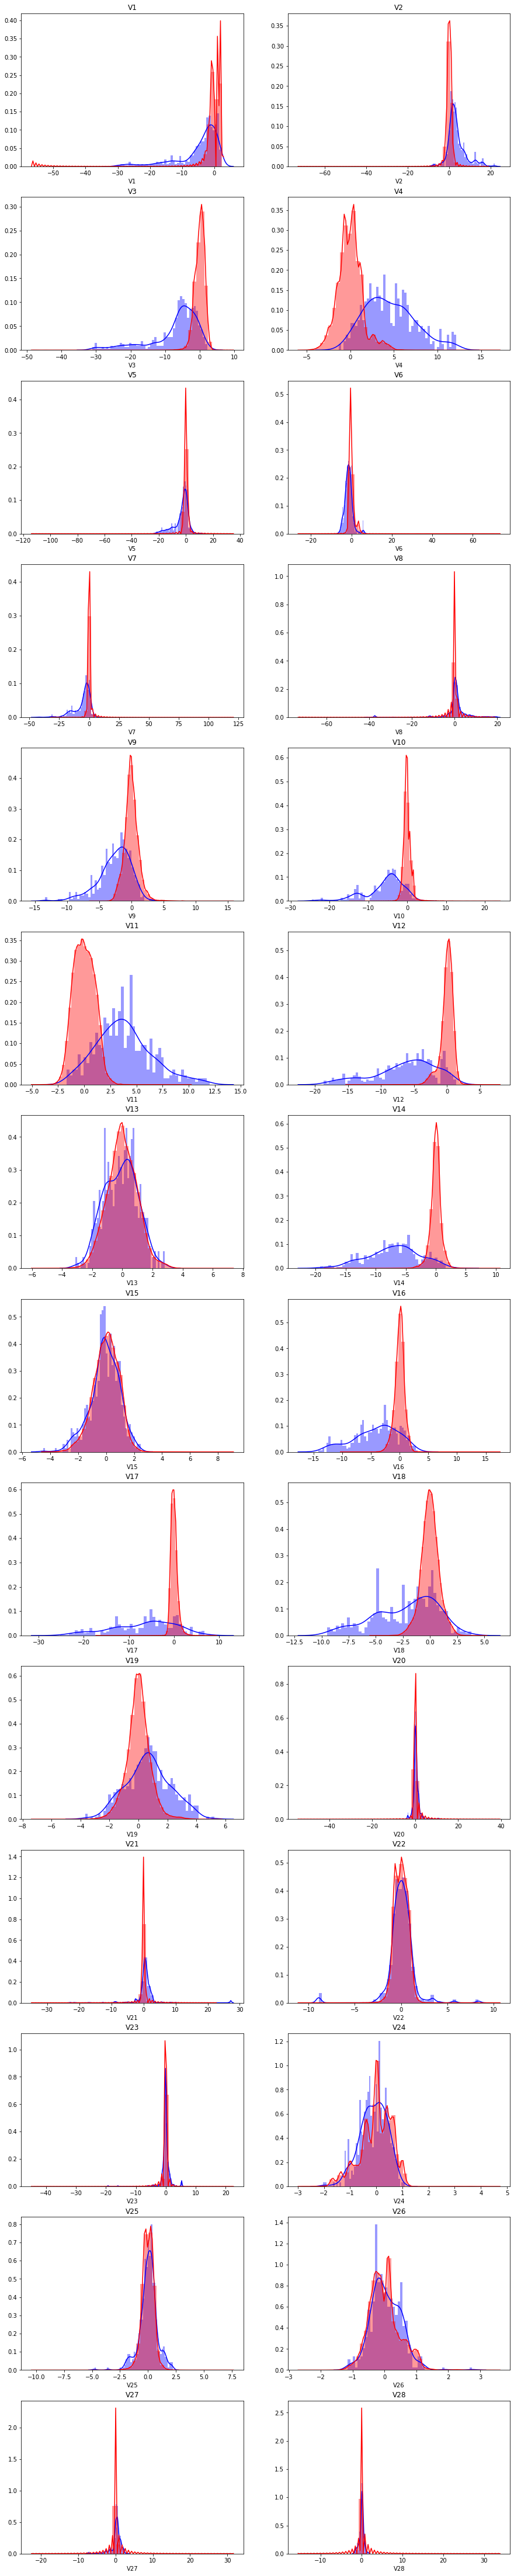

In [111]:
columns = df.iloc[:,1:29].columns

grid = gridspec.GridSpec(14,2)
plt.figure(figsize=(15,20*4))
for n, col in enumerate(columns):
    ax = plt.subplot(grid[n])
    sns.distplot(df[df.Class==1][col], bins=50, color='b')
    sns.distplot(df[df.Class==0][col], bins=50, color='r')
    ax.set_title(col)
plt.show()

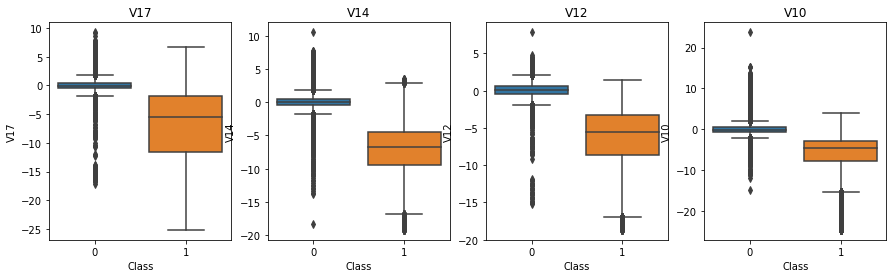

In [119]:
columns = ['V17','V14','V12','V10']
grid = gridspec.GridSpec(1,4)
plt.figure(figsize=(15,4))
for n, col in enumerate(columns):
    ax = plt.subplot(grid[n])
    sns.boxplot(x='Class',y=col, data=df_over)
    ax.set_title(col)

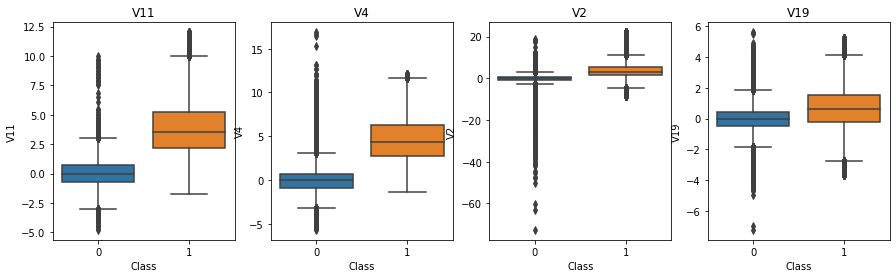

In [120]:
columns = ['V11','V4','V2','V19']
grid = gridspec.GridSpec(1,4)
plt.figure(figsize=(15,4))
for n, col in enumerate(columns):
    ax = plt.subplot(grid[n])
    sns.boxplot(x='Class',y=col, data=df_over)
    ax.set_title(col)

#### 5. Correlation matrix

In [106]:
def heatmap(df, chart_title):
    corr = df.corr()

    plt.figure(figsize=(10,8))
    sns.heatmap(corr, cmap='coolwarm_r')
    plt.title(chart_title, fontsize=20)

from collections import Counter
def after_smote_df(df, x_num_col, y, seed):
    """
    
    """
    x = df.drop(y, axis=1)
    x = x[x_num_col]
    y = df[y]
    
    smote = SMOTE(random_state=seed)
    x_over, y_over = smote.fit_resample(x,y)
    
    x_over = pd.DataFrame(x_over, columns=x.columns)
    y_over = pd.DataFrame(y_over)
    df_over = pd.concat([x_over, y_over], axis=1)
    
    print('Ratio before oversampling: ',Counter(y))
    print('Ratio after oversampling: ',Counter(y_over))
    
    return df_over

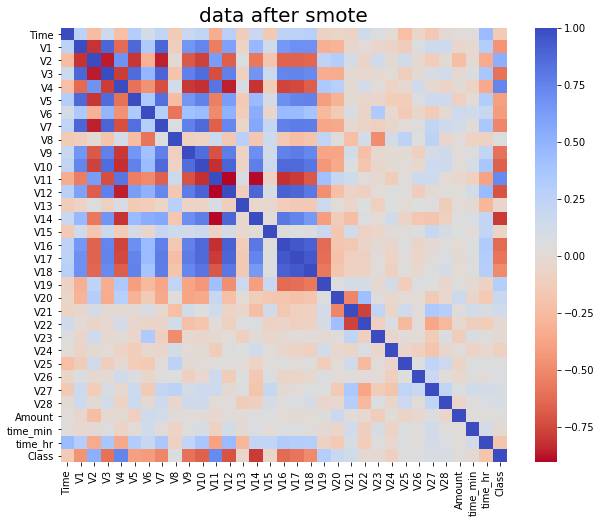

In [108]:
x_num_col = list(df.drop(['timedelta','Class'],axis=1).columns)
df_over = after_smote_df(df, x_num_col, 'Class', 88)
heatmap(df_over,"data after smote")

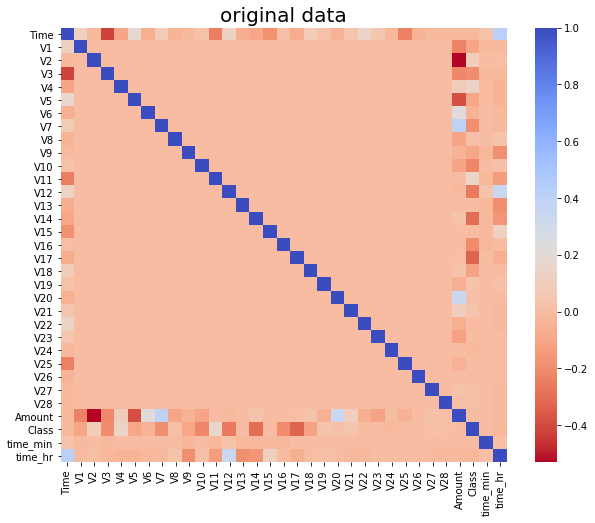

In [109]:
heatmap(df,"original data")

## Feature Selection

#### 1. feature selection from distribution plot

In [20]:
df_red1 = df[[
    "time_hr","time_min","V2","V3","V4",
    "V9","V10","V11","V12","V14","V16","V17",
    "V18","V19","V27","Amount","Time","Class"
]]

## SMOTE

In [15]:
from imblearn.pipeline import make_pipeline as make_pipeline_imb # To do our transformation in a unique time
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced
from imblearn.under_sampling import RandomUnderSampler

from sklearn.model_selection import train_test_split
from collections import Counter

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import precision_score, recall_score, fbeta_score, confusion_matrix, precision_recall_curve, accuracy_score

#### Data scaling
1. Standardize amount and time columns, since others are standardized
2. Standardize should be done after train and test split to prevent data leakage

In [ ]:
x = df_red1.drop('Class', axis=1).values
y = df_red1['Class'].values
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=1,test_size=0.2)

In [21]:
from sklearn.preprocessing import StandardScaler, RobustScaler
std_scaler = StandardScaler()
rob_scaler = RobustScaler() # robust scaler is less prone to outliers

x_train['amount_std']=rob_scaler.fit_transform(x_train['Amount'].values.reshape(-1,1))
x_train['time_std']=rob_scaler.fit_transform(x_train['Time'].values.reshape(-1,1))
x_train['time_min_std']=rob_scaler.fit_transform(x_train['time_min'].values.reshape(-1,1))
x_train['time_hr_std']=rob_scaler.fit_transform(x_train['time_hr'].values.reshape(-1,1))

x_test['amount_std']=rob_scaler.fit_transform(x_test['Amount'].values.reshape(-1,1))
x_test['time_std']=rob_scaler.fit_transform(x_test['Time'].values.reshape(-1,1))
x_test['time_min_std']=rob_scaler.fit_transform(x_test['time_min'].values.reshape(-1,1))
x_test['time_hr_std']=rob_scaler.fit_transform(x_test['time_hr'].values.reshape(-1,1))

C:\Users\ctyfr\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\ctyfr\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ctyfr\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

In [40]:
def print_results(headline, true_value, pred):
    print(headline)
    print("accuracy: {}".format(accuracy_score(true_value, pred)))
    print("precision: {}".format(precision_score(true_value, pred)))
    print("recall: {}".format(recall_score(true_value, pred)))
    print("f2: {}".format(fbeta_score(true_value, pred, beta=2)))

#### SMOTE + RF parameter tuning
1. fine tune RF parameters

In [75]:
# smote
rf = RandomForestClassifier(random_state=88)
smote = SMOTE(random_state=88)
pipeline = Pipeline([('sampling', smote), ('class', rf)])
# print(Counter(y))

# RF: grid search
grid = {'class__n_estimators': [200, 500],
        'class__max_features': ['auto', 'sqrt', 'log2'],
        'class__max_depth' : [4,5,6,7,8],
        'class__criterion' :['gini', 'entropy'],
        'class__class_weight':['balanced',{0:1,1:2}],
        'class__min_samples_leaf':[9,10,11,12]}
grid_cv = GridSearchCV(pipeline, grid, scoring = 'recall', cv = 5)
grid_cv.fit(x_train, y_train)

# find the best score
print(grid_cv.best_score_)
print(grid_cv.best_params_)

# fit the best random forest
rf_best = RandomForestClassifier(max_depth = 7, 
                             max_features = 'sqrt', 
                             n_estimators=10)
pipemodel = pipeline.fit(x_train, y_train)
y_pred = pipemodel.predict(x_test)
print_results('best rf with grid search', y_test, y_pred)

#### Smote parameter tuning
1. fine tune number of neighbors, oversampling and undersampling ratio
2. other types of SMOTE: https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

In [27]:
k_values = list(range(1,10))
for k in k_values:
    classifier = RandomForestClassifier()
    smote = SMOTE(sampling_strategy=0.1, k_neighbors=k) # sometimes without sampling_strategy works better
    under = RandomUnderSampler(sampling_strategy=0.5) # sometimes without undersampling works better
    pipeline = make_pipeline_imb(smote, classifier)
    
    # fit model
    smote_model = pipeline.fit(x_train,y_train)
    smote_pred = smote_model.predict(x_test)
    # evaluate
    print_results('result for k = {}'.format(k), y_test, smote_pred)
    print('\n --------------------------- \n')
    

result for k = 1
accuracy: 0.9995435553526912
precision: 0.9066666666666666
recall: 0.7816091954022989
f2: 0.8037825059101656

 --------------------------- 

result for k = 2
accuracy: 0.9995259997893332
precision: 0.8947368421052632
recall: 0.7816091954022989
f2: 0.8018867924528302

 --------------------------- 

result for k = 3
accuracy: 0.9995435553526912
precision: 0.9066666666666666
recall: 0.7816091954022989
f2: 0.8037825059101656

 --------------------------- 

result for k = 4
accuracy: 0.9995259997893332
precision: 0.8846153846153846
recall: 0.7931034482758621
f2: 0.8098591549295776

 --------------------------- 

result for k = 5
accuracy: 0.9995259997893332
precision: 0.8846153846153846
recall: 0.7931034482758621
f2: 0.8098591549295776

 --------------------------- 



KeyboardInterrupt: 

#### Manipulate decision threshold
1. threshold tuning
2. criteria comparison: recall, precision, f1, confusion matrix

In [61]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

recall (threshold = 0.3): 0.8160919540229885
precision (threshold = 0.3): 0.7029702970297029
f1 (threshold = 0.3): 0.7553191489361702

 ---------------------- 

recall (threshold = 0.4): 0.8045977011494253
precision (threshold = 0.4): 0.813953488372093
f1 (threshold = 0.4): 0.8092485549132948

 ---------------------- 

recall (threshold = 0.5): 0.7931034482758621
precision (threshold = 0.5): 0.8734177215189873
f1 (threshold = 0.5): 0.8313253012048193

 ---------------------- 

recall (threshold = 0.6): 0.7931034482758621
precision (threshold = 0.6): 0.8961038961038961
f1 (threshold = 0.6): 0.8414634146341463

 ---------------------- 

recall (threshold = 0.7): 0.7701149425287356
precision (threshold = 0.7): 0.9054054054054054
f1 (threshold = 0.7): 0.8322981366459626

 ---------------------- 



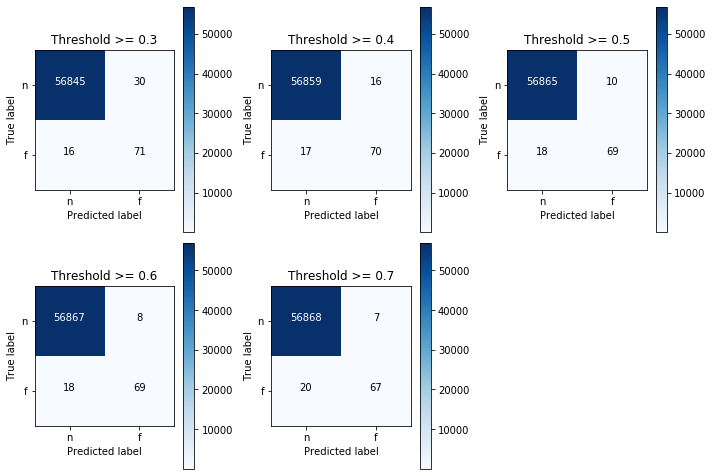

In [69]:
y_pred_prob = pipemodel.predict_proba(x_test)
thresh = [0.3,0.4,0.5,0.6,0.7]
plt.figure(figsize=(10,10))
j=1
for i in thresh:
    y_pred_recall = y_pred_prob[:,1]>i
    
    plt.subplot(3,3,j)
    j+=1
    
    cnf = confusion_matrix(y_test, y_pred_recall)
    precision = cnf[1,1]/(cnf[0,1] +cnf[1,1])
    recall = cnf[1,1]/(cnf[1,0] +cnf[1,1])
    f1 = 2*(precision*recall)/(precision+recall)                    
    np.set_printoptions(precision=2)

    print("recall (threshold = {}):".format(i), recall)
    print("precision (threshold = {}):".format(i), precision)
    print("f1 (threshold = {}):".format(i), f1)
    print('\n ---------------------- \n')

    
    class_names = ['n','f']
    plot_confusion_matrix(cnf,
                         classes=class_names,
                         title = 'Threshold >= {}'.format(i))